In [1]:
import numpy as np
# from pymanopt.function import numpy
from qutip import *
import jcm_lib as jcm
import os
import time
import matplotlib.pyplot as plt
from entrelazamiento_lib import negativity_hor

# script_path = os.path.dirname(__file__)  #DEFINIMOS EL PATH AL FILE GENERICAMENTE PARA QUE FUNCIONE DESDE CUALQUIER COMPU


In [2]:
N_c=3
steps=3000
g_t=30

w0=1
g=0.01*w0

gamma=0*g

x=[0*g,1*g,2*g,0*g,1*g,2*g,0*g,1*g,2*g]       #1*g va en orden ascendiente
d=0*g       #1.1001*g#.5*g

k=[0*g,0*g,0*g,1*g,1*g,1*g,2*g,2*g,2*g]        #0*g va en orden descendiente para ser consistente con la flecha dibujada mas abajo en el plot
J=0*g
print(list(zip(x,k)))
t_final=g_t/g
t=np.linspace(0,t_final,steps)

delta_min=-10*g
delta_max=10*g
delta=np.linspace(delta_min,delta_max,150)
delta_ticks=np.linspace(delta_min/g,delta_max/g,150)

[(0.0, 0.0), (0.01, 0.0), (0.02, 0.0), (0.0, 0.01), (0.01, 0.01), (0.02, 0.01), (0.0, 0.02), (0.01, 0.02), (0.02, 0.02)]


In [3]:
ee=basis([2,2],[0,0])
eg=basis([2,2],[0,1])
ge=basis([2,2],[1,0])
gg=basis([2,2],[1,1])

n=tensor(qeye(2),qeye(2),num(N_c))
# sqrtN=tensor(qeye(2),qeye(2),Qobj(np.diag([0,1,np.sqrt(2)])))
n2=tensor(qeye(2),qeye(2),Qobj(np.diag([i*i for i in range(N_c)])))
a=tensor(qeye(2),qeye(2),destroy(N_c))
sm1=tensor(sigmam(),qeye(2),qeye(N_c))
sp1=tensor(sigmap(),qeye(2),qeye(N_c))
sz1=tensor(sigmaz(),qeye(2),qeye(N_c))
sx1=tensor(sigmax(),qeye(2),qeye(N_c))
sm2=tensor(qeye(2),sigmam(),qeye(N_c))
sp2=tensor(qeye(2),sigmap(),qeye(N_c))
sz2=tensor(qeye(2),sigmaz(),qeye(N_c))
sx2=tensor(qeye(2),sigmax(),qeye(N_c))


In [4]:
def heatplot(x_data:list,title:str,psi0Name:str):
    fig_u=plt.figure(figsize=(8,6))
    # fig.suptitle(f"Concurrence $\psi_0$={psi0Name}")
    ax_u=fig_u.add_subplot()
    fig_u.suptitle(title)
    ax_u.set_xlabel('$gt$')
    ax_u.set_ylabel('$\Delta/g$')
    c0 = ax_u.pcolor(g*t, delta_ticks, x_data, shading='auto', cmap='jet',vmin=0,vmax=1)
    contour_u = ax_u.contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
    ax_u.clabel(contour_u, fmt="%.1f",colors='red',fontsize=10)
    fig_u.colorbar(c0, ax=ax_u,shrink=0.7)
    fig_u.savefig(rf'graficos\negativity\{psi0Name} {title} x={x/g}g k={k/g}g J={J/g}g neg delta dis.png')


<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\1702168804.py:7: SyntaxWarning: invalid escape sequence '\D'
  ax_u.set_ylabel('$\Delta/g$')


In [5]:

# metodo=str(input('Metodo: '))

# delta_fg_3T=np.zeros((len(gamma_list),len(delta)))
# delta_fg_10T=np.zeros((len(gamma_list),len(delta)))

N_0=np.zeros((9,len(delta),steps))
N_1=np.zeros((9,len(delta),steps))
N_2=np.zeros((9,len(delta),steps))

N_01=np.zeros((9,len(delta),steps))
N_02=np.zeros((9,len(delta),steps))
N_12=np.zeros((9,len(delta),steps))

# concu_d=np.zeros((len(delta),steps))
l=0
for x,k in zip(x,k):
    for i,d in enumerate(delta):
        rho_0=tensor((eg+ge).unit(),basis(N_c,1))
        rho_0Name='eg1'

        H=x*n2 + d/2*(sz1+sz2) + g*((sm1+sm2)*a.dag()+(sp1+sp2)*a) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2

        p=0.005*g

        sol=mesolve(H,rho_0,t,c_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp1,np.sqrt(p)*sp2])

        fg_total,arg_tot,eigenvals_tot_t=jcm.fases(sol)


        for j in range(len(sol.states)):
            N_0[l,i,j]=negativity_hor(sol.states[j],[1,0,0])
            N_1[l,i,j]=negativity_hor(sol.states[j],[0,1,0])
            N_2[l,i,j]=negativity_hor(sol.states[j],[0,0,1])

            N_01[l,i,j]=negativity_hor(sol.states[j].ptrace([0,1]),[1,0])
            N_02[l,i,j]=negativity_hor(sol.states[j].ptrace([0,2]),[1,0])
            N_12[l,i,j]=negativity_hor(sol.states[j].ptrace([1,2]),[1,0])
    l+=1
    

In [6]:
# def heatplot3x3(negativity_data,title:str,rho_0Name:str):
#     x_max=np.max(negativity_data)
#     x_min=np.min(negativity_data)

#     fig, axd = plt.subplot_mosaic(
#     [
#         ['plot0', 'plot1', 'plot2', 'colorbar'],
#         ['plot3', 'plot4', 'plot5', 'colorbar'],
#         ['plot6', 'plot7', 'plot8', 'colorbar']
#     ],
#     figsize=(10, 8),
#     gridspec_kw={'width_ratios': [1, 1, 1, 0.05]}
#     )
#     fig.suptitle(title)
#     # Create plots
#     for l in range(0,9):
#         x_data=negativity_data[l,:,:]
#         ax_name = f'plot{l}'
#         im = axd[ax_name].imshow(x_data, cmap='viridis')
#         if l==0:
#             axd[ax_name].annotate(r'$\chi$', xy=(2.95, 1.05), xycoords='axes fraction', xytext=(-0.05, 1.05),
#                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, ha='center')
#             axd[ax_name].annotate(r'$k$', xy=(-0.07, -2), xycoords='axes fraction', xytext=(-0.1, 0.95),
#                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, va='center')

#         if l==0 or l==3 or l==6:
#             axd[ax_name].set_ylabel('$\Delta/g$')
#         if l==6 or l==7 or l==8:
#             axd[ax_name].set_xlabel('$gt$')
#         c0 = axd[ax_name].pcolor(g*t, delta_ticks, x_data, shading='auto', cmap='magma',vmin=x_min,vmax=x_max)

#     # Add colorbar
#     cbar=fig.colorbar(c0, cax=axd['colorbar'])
#     cbar.set_label('N')

#     fig.savefig(rf'graficos\negativity\3x3 {rho_0Name} {title} 012 012.png')

#     plt.show()

from matplotlib import cm


def heatplot3x3(negativity_data,title:str,rho_0Name:str):
    x_max=np.max(negativity_data)
    x_min=np.min(negativity_data)

    fig_0, axes = plt.subplots(3, 3, figsize=(10, 8))
    axes = axes.flatten()
    # fig.suptitle(f"Concurrence $\psi_0$={psi0Name}")
    fig_0.suptitle(title)
    axes[0].annotate(r'$\chi$', xy=(2.95, 1.05), xycoords='axes fraction', xytext=(-0.05, 1.05),
        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, ha='center')
    axes[0].annotate(r'$k$', xy=(-0.07, -2), xycoords='axes fraction', xytext=(-0.1, 0.95),
        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, va='center')
    for l in range(9):
        x_data=negativity_data[l,:,:]
        if l==0 or l==3 or l==6:
            axes[l].set_ylabel('$\Delta/g$')
        if l==6 or l==7 or l==8:
            axes[l].set_xlabel('$gt$')
        c0 = axes[l].pcolor(g*t, delta_ticks, x_data, shading='auto', cmap='magma',vmin=x_min,vmax=x_max)
        contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
        # axes[l].clabel(contour_0, fmt="%.1f",colors='red',fontsize=10)
        axes[l].set_xticklabels([])
        axes[l].set_yticklabels([])

    # fig_0.colorbar(c0, ax=ax_0,shrink=0.7)

    # Adjust layout to make room for colorbar
    plt.tight_layout()

    # Add colorbar to the right of the figure
    fig_0.subplots_adjust(right=0.9)
    cbar_ax = fig_0.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    fig_0.colorbar(cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=x_min, vmax=x_max)), cax=cbar_ax, label='N')
    if gamma!=0:
        fig_0.savefig(rf'graficos\negativity\3x3 dis {rho_0Name} {title} 012 012 1.png')
    elif p!=0 and gamma==0:
        fig_0.savefig(rf'graficos\negativity\3x3 dep {rho_0Name} {title} 012 012 005.png')
    else:
        fig_0.savefig(rf'graficos\negativity\3x3 {rho_0Name} {title} 012 012.png')

    plt.show()

<>:58: SyntaxWarning: invalid escape sequence '\D'
<>:58: SyntaxWarning: invalid escape sequence '\D'
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:58: SyntaxWarning: invalid escape sequence '\D'
  axes[l].set_ylabel('$\Delta/g$')


C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l]

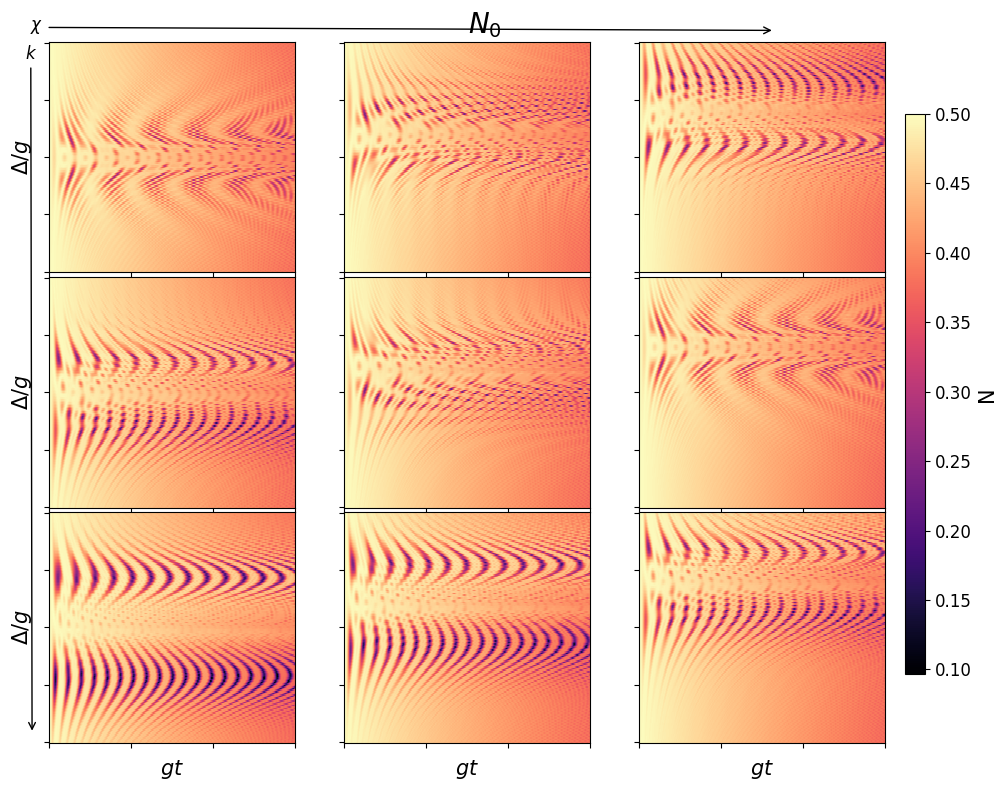

In [7]:
heatplot3x3(N_0,r'$N_0$',rho_0Name)


C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l]

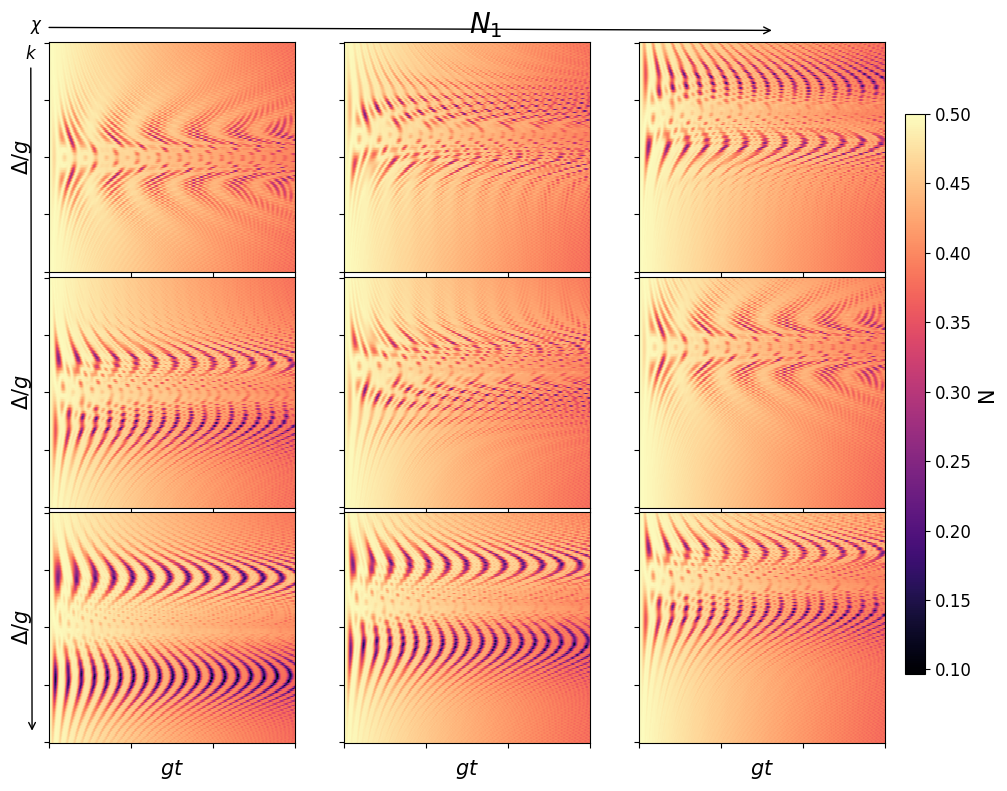

In [8]:
heatplot3x3(N_1,r'$N_1$',rho_0Name)


C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l]

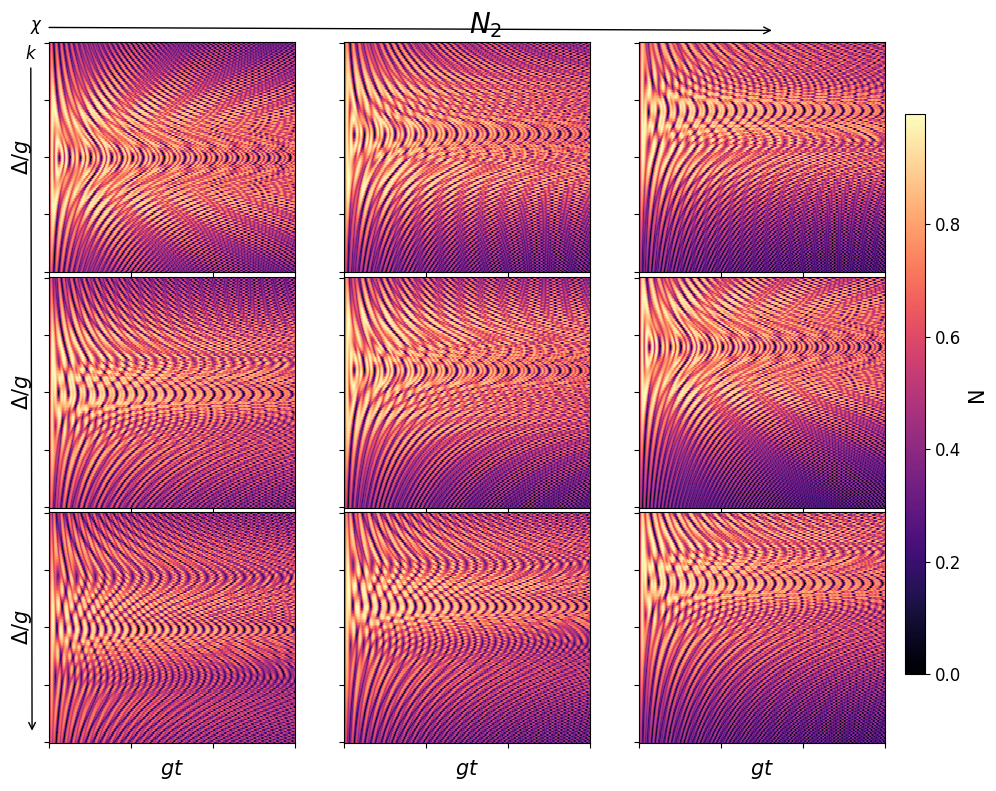

In [9]:
heatplot3x3(N_2,r'$N_2$',rho_0Name)


C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l]

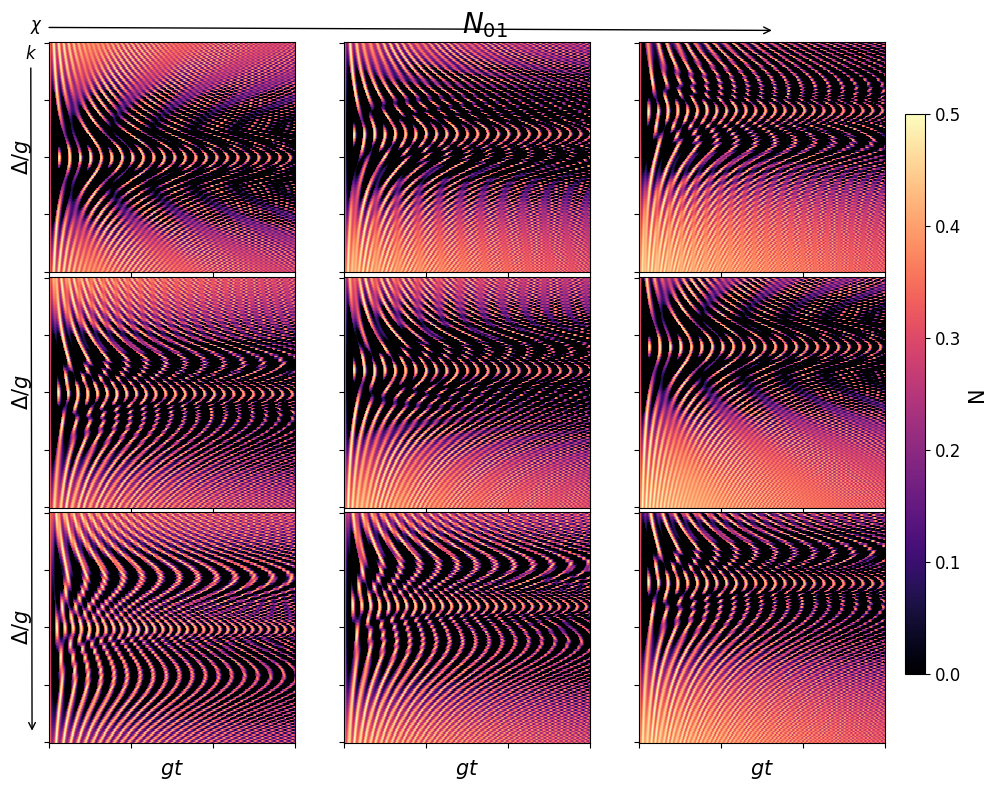

In [10]:
heatplot3x3(N_01,r'$N_{01}$',rho_0Name)


C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l]

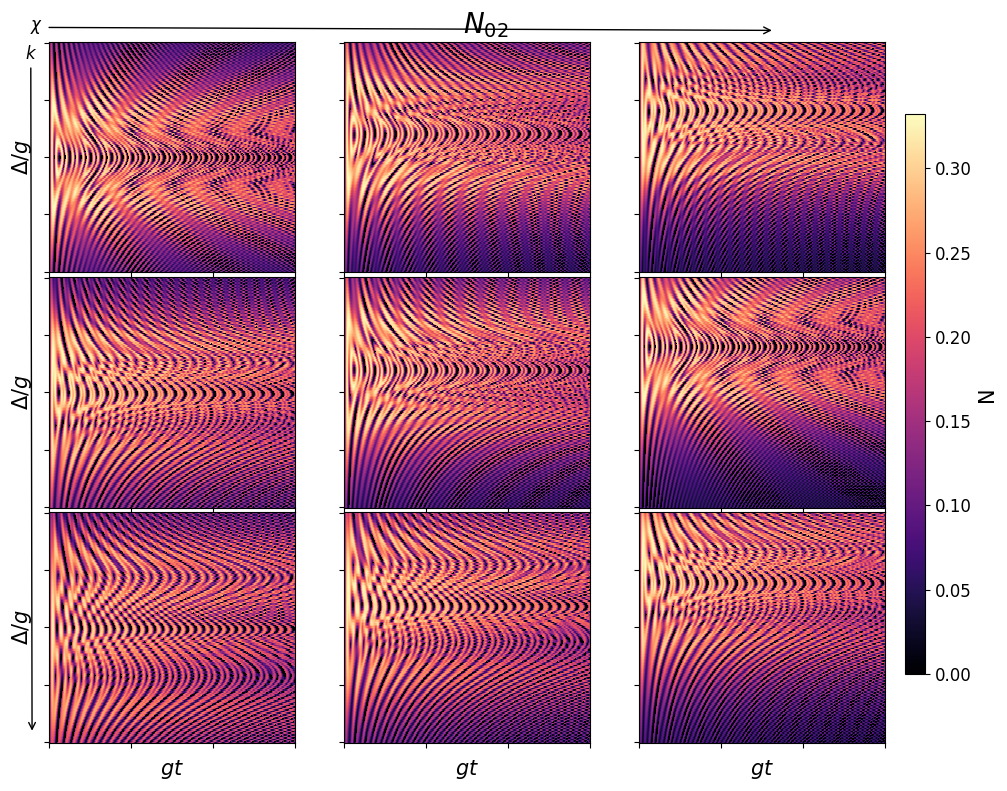

In [11]:
heatplot3x3(N_02,r'$N_{02}$',rho_0Name)


C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l].contourf(g*t, delta_ticks, x_data,levels=[0,0.01],colors='black',linewidths=1)
C:\Users\alima\AppData\Local\Temp\ipykernel_29776\2862006269.py:62: UserWarning: linewidths is ignored by contourf
  contour_0 = axes[l]

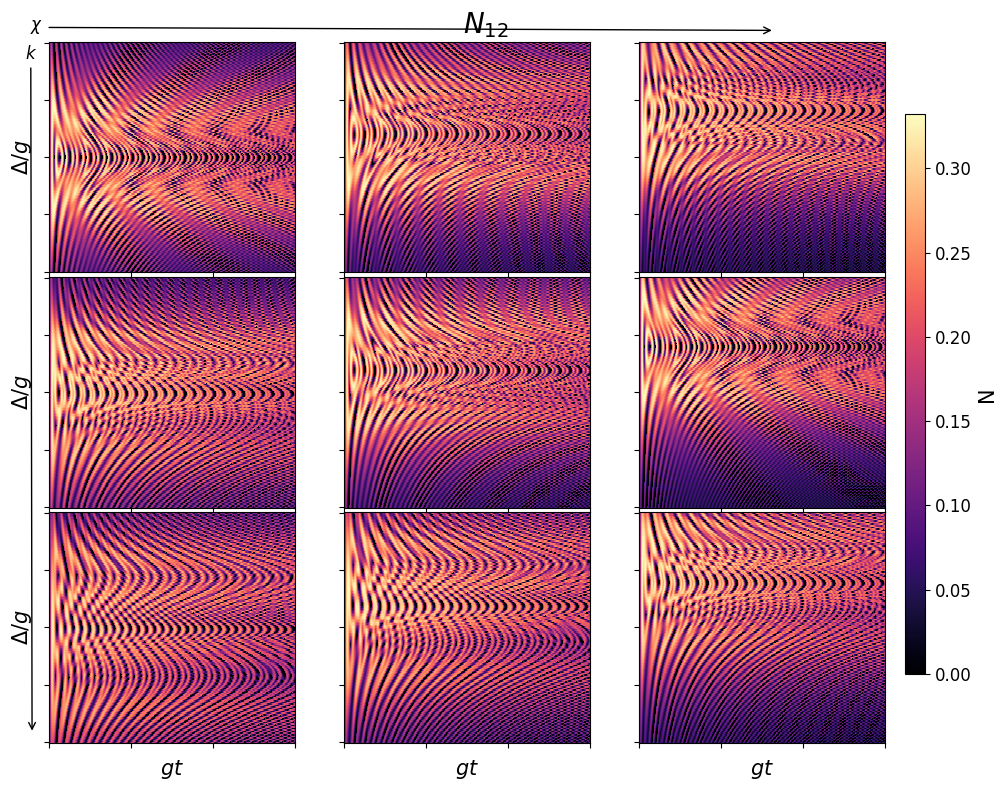

In [12]:

heatplot3x3(N_12,r'$N_{12}$',rho_0Name)